## Clinical Trial Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('../Data/ICI_Clini_Dat_20240606.xlsx')
df.head()

,Num,PID,NGS_ID,16S_ID,Metebolism_ID,Metebolism_ID2,Batch,Gender,BMI,BMI_C,...,AB_b1M_T,AB_ab1M_K,AB_ab1M_Q,AB_ab1M_T,AB_a1M_K,AB_a1M_Q,AB_a1M_T,AB_a2M_K,AB_a2M_Q,AB_a2M_T
0,1,P1,PH-12,XS-10,A30,BMK230309-BH533-010030-01,B1,Male,23.335466,M,...,0,0,0,0,0,0,0,0,0,0
1,2,P2,PH-60,XS-75,A33,BMK230309-BH533-010033-01,B1,Male,29.053288,H,...,0,0,0,0,0,0,0,0,0,0
2,3,P3,PH-61,NaN,NaN,NaN,B1,Male,21.192742,M,...,0,0,0,0,0,0,0,0,0,0
3,4,P4,PH-62,XS-62,A31,BMK230309-BH533-010031-01,B1,Male,22.410269,M,...,0,0,0,0,0,0,0,0,0,0
4,5,P5,PH-63,XS-78,NaN,NaN,B1,Male,26.562500,H,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['Num', 'PID', 'NGS_ID', '16S_ID', 'Metebolism_ID', 'Metebolism_ID2',
       'Batch', 'Gender', 'BMI', 'BMI_C', 'AGE', 'AGE_C', 'Smoking',
       'Tumor_Loc', 'Tumor_Subtype', 'Stage', 'COPD', 'PD_L1', 'ECOG', 'DNLR',
       'PNI', 'LDH', 'Infection', 'Metastasis', 'Intrapulmonary_met', 'LN_met',
       'AdrenalGlands_met', 'Pleura_Met', 'Brain_Met', 'Liver_Met', 'Bone_Met',
       'AB_b3M', 'AB_b2M', 'AB_b1M', 'AB_bUse', 'AB_ab1M', 'AB_a1M', 'AB_a2M',
       'TreatmentType', 'Fst_Esti', 'Responce', 'ORR', 'DCR', 'PFS_Status',
       'PFS_Time', 'oS_Status', 'OS_Lost', 'OS_Time', 'AEr', 'Responce2',
       'AGE_C2', 'SampingDate', 'AB_b3M_K', 'AB_b3M_Q', 'AB_b3M_T', 'AB_b2M_K',
       'AB_b2M_Q', 'AB_b2M_T', 'AB_b1M_K', 'AB_b1M_Q', 'AB_b1M_T', 'AB_ab1M_K',
       'AB_ab1M_Q', 'AB_ab1M_T', 'AB_a1M_K', 'AB_a1M_Q', 'AB_a1M_T',
       'AB_a2M_K', 'AB_a2M_Q', 'AB_a2M_T'],
      dtype='object')

In [4]:
selected_columns = ['PID', 'NGS_ID', '16S_ID', 'Metebolism_ID', 'Metebolism_ID2',
                    'Batch', 'Gender', 'BMI', 'AGE', 'Smoking',
                    'Tumor_Loc', 'Tumor_Subtype', 'Stage', 'COPD', 'PD_L1', 'ECOG', 'DNLR',
                    'PNI', 'LDH', 'Infection', 'Intrapulmonary_met', 'LN_met',
                    'AdrenalGlands_met', 'Pleura_Met', 'Brain_Met', 'Liver_Met', 'Bone_Met',
                    'AB_b3M', 'AB_b2M', 'AB_b1M', 'AB_bUse', 'AB_ab1M', 'AB_a1M', 'AB_a2M',
                    'AB_b3M_K', 'AB_b3M_Q', 'AB_b3M_T', 'AB_b2M_K',
                    'AB_b2M_Q', 'AB_b2M_T', 'AB_b1M_K', 'AB_b1M_Q', 'AB_b1M_T', 'AB_ab1M_K',
                    'AB_ab1M_Q', 'AB_ab1M_T', 'AB_a1M_K', 'AB_a1M_Q', 'AB_a1M_T',
                    'AB_a2M_K', 'AB_a2M_Q', 'AB_a2M_T',
                    'TreatmentType',  'Responce',  'Responce2',
                    ]
selected_df = df[selected_columns]

In [5]:
selected_df.head()

,PID,NGS_ID,16S_ID,Metebolism_ID,Metebolism_ID2,Batch,Gender,BMI,AGE,Smoking,...,AB_ab1M_T,AB_a1M_K,AB_a1M_Q,AB_a1M_T,AB_a2M_K,AB_a2M_Q,AB_a2M_T,TreatmentType,Responce,Responce2
0,P1,PH-12,XS-10,A30,BMK230309-BH533-010030-01,B1,Male,23.335466,59,Never,...,0,0,0,0,0,0,0,2,PR,CR-PR
1,P2,PH-60,XS-75,A33,BMK230309-BH533-010033-01,B1,Male,29.053288,71,Former,...,0,0,0,0,0,0,0,2,PR,CR-PR
2,P3,PH-61,NaN,NaN,NaN,B1,Male,21.192742,71,Former,...,0,0,0,0,0,0,0,2,PR,CR-PR
3,P4,PH-62,XS-62,A31,BMK230309-BH533-010031-01,B1,Male,22.410269,59,Former,...,0,0,0,0,0,0,0,2,SD,SD
4,P5,PH-63,XS-78,NaN,NaN,B1,Male,26.562500,48,Former,...,0,0,0,0,0,0,0,2,PR,CR-PR


In [6]:
columns_Y_N = [
                    'Batch', 'Gender',
                    'Tumor_Loc', 'Tumor_Subtype', 'Stage', 'COPD', 'PD_L1', 'ECOG', 'DNLR',
                    'PNI', 'LDH', 'Infection', 'Intrapulmonary_met', 'LN_met',
                    'AdrenalGlands_met', 'Pleura_Met', 'Brain_Met', 'Liver_Met', 'Bone_Met',
                    'AB_b3M', 'AB_b2M', 'AB_b1M', 'AB_bUse', 'AB_ab1M', 'AB_a1M', 'AB_a2M',
                    'AB_b3M_K', 'AB_b3M_Q', 'AB_b3M_T', 'AB_b2M_K',
                    'AB_b2M_Q', 'AB_b2M_T', 'AB_b1M_K', 'AB_b1M_Q', 'AB_b1M_T', 'AB_ab1M_K',
                    'AB_ab1M_Q', 'AB_ab1M_T', 'AB_a1M_K', 'AB_a1M_Q', 'AB_a1M_T',
                    'AB_a2M_K', 'AB_a2M_Q', 'AB_a2M_T',
                     ]
selected_df_onehot= selected_df.copy()
for column in columns_Y_N:
    selected_df_onehot[column], uniques = pd.factorize(selected_df[column])
selected_df_onehot['AB_b_Q'] = selected_df_onehot['AB_b3M_Q'] | selected_df_onehot['AB_b2M_Q'] | selected_df_onehot['AB_b1M_Q']
selected_df_onehot['AB_b_K'] = selected_df_onehot['AB_b3M_K'] | selected_df_onehot['AB_b2M_K'] | selected_df_onehot['AB_b1M_K']
selected_df_onehot['AB_b_T'] = selected_df_onehot['AB_b3M_T'] | selected_df_onehot['AB_b2M_T'] | selected_df_onehot['AB_b1M_T']
selected_df_onehot['AB_a_Q'] = selected_df_onehot['AB_a2M_Q'] | selected_df_onehot['AB_a1M_Q']
selected_df_onehot['AB_a_K'] = selected_df_onehot['AB_a2M_K'] | selected_df_onehot['AB_a1M_K']
selected_df_onehot['AB_a_T'] =  selected_df_onehot['AB_a2M_T'] | selected_df_onehot['AB_a1M_T']
smoking_mapping = {'Never': 0, 'Former': 1, 'Current': 2}
# 使用map方法进行映射
selected_df_onehot['Smoking'] = selected_df_onehot['Smoking'].map(smoking_mapping)

columns_mul_types = ['TreatmentType', 'Responce', 'Responce2']
selected_df_onehot = pd.get_dummies(
    selected_df_onehot, columns=columns_mul_types)

selected_df_onehot = selected_df_onehot.fillna(-1)

col_idx = selected_df_onehot.columns.get_loc('Batch')
numeric_df = selected_df_onehot.iloc[:,col_idx:].astype(float)
selected_df_onehot = pd.concat([selected_df_onehot.iloc[:, :col_idx], numeric_df], axis=1)
selected_df_onehot.to_excel('../Data/cli.xlsx', index=False)


print(selected_df_onehot.columns)
selected_df_onehot.head()

Index(['PID', 'NGS_ID', '16S_ID', 'Metebolism_ID', 'Metebolism_ID2', 'Batch',
       'Gender', 'BMI', 'AGE', 'Smoking', 'Tumor_Loc', 'Tumor_Subtype',
       'Stage', 'COPD', 'PD_L1', 'ECOG', 'DNLR', 'PNI', 'LDH', 'Infection',
       'Intrapulmonary_met', 'LN_met', 'AdrenalGlands_met', 'Pleura_Met',
       'Brain_Met', 'Liver_Met', 'Bone_Met', 'AB_b3M', 'AB_b2M', 'AB_b1M',
       'AB_bUse', 'AB_ab1M', 'AB_a1M', 'AB_a2M', 'AB_b3M_K', 'AB_b3M_Q',
       'AB_b3M_T', 'AB_b2M_K', 'AB_b2M_Q', 'AB_b2M_T', 'AB_b1M_K', 'AB_b1M_Q',
       'AB_b1M_T', 'AB_ab1M_K', 'AB_ab1M_Q', 'AB_ab1M_T', 'AB_a1M_K',
       'AB_a1M_Q', 'AB_a1M_T', 'AB_a2M_K', 'AB_a2M_Q', 'AB_a2M_T', 'AB_b_Q',
       'AB_b_K', 'AB_b_T', 'AB_a_Q', 'AB_a_K', 'AB_a_T', 'TreatmentType_1',
       'TreatmentType_2', 'TreatmentType_3', 'TreatmentType_4', 'Responce_CR',
       'Responce_PD', 'Responce_PR', 'Responce_SD', 'Responce2_CR-PR',
       'Responce2_PD', 'Responce2_SD'],
      dtype='object')


,PID,NGS_ID,16S_ID,Metebolism_ID,Metebolism_ID2,Batch,Gender,BMI,AGE,Smoking,...,TreatmentType_2,TreatmentType_3,TreatmentType_4,Responce_CR,Responce_PD,Responce_PR,Responce_SD,Responce2_CR-PR,Responce2_PD,Responce2_SD
0,P1,PH-12,XS-10,A30,BMK230309-BH533-010030-01,0.0,0.0,23.335466,59.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,P2,PH-60,XS-75,A33,BMK230309-BH533-010033-01,0.0,0.0,29.053288,71.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,P3,PH-61,-1,-1,-1,0.0,0.0,21.192742,71.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,P4,PH-62,XS-62,A31,BMK230309-BH533-010031-01,0.0,0.0,22.410269,59.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,P5,PH-63,XS-78,-1,-1,0.0,0.0,26.562500,48.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## mNGS Data Processing Pipeline and Merging

(121, 1128)
(121, 987)
(121, 986)
low_abun ratio:  0.8936767639515196
len dense 382
tag2 (121, 382)


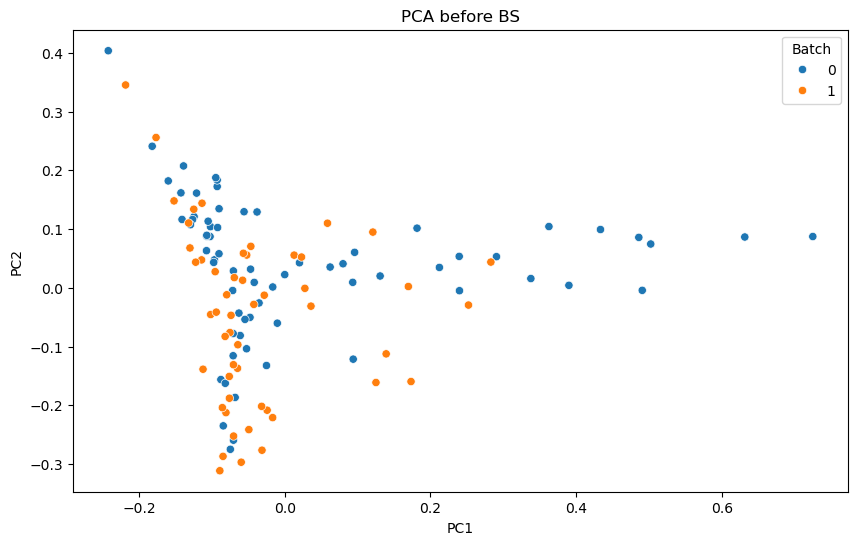

tag1 torch.Size([121, 382])
tag1 torch.Size([121, 382])


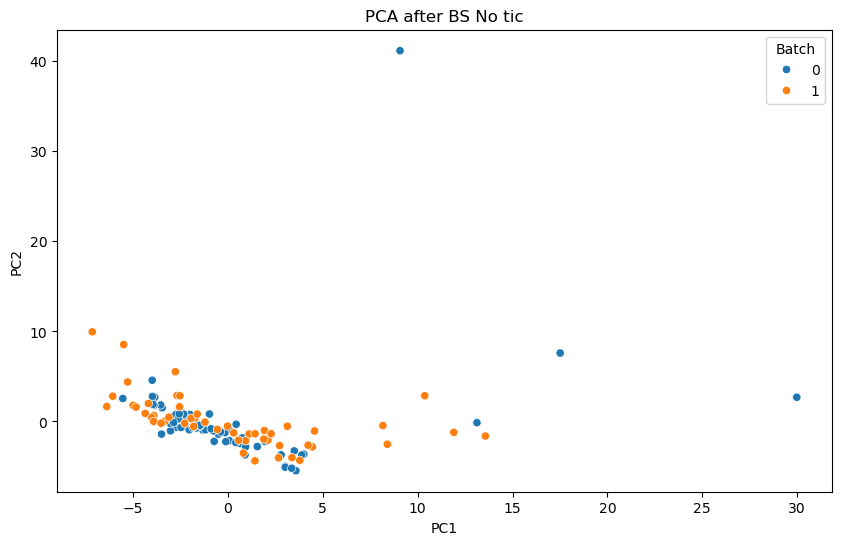

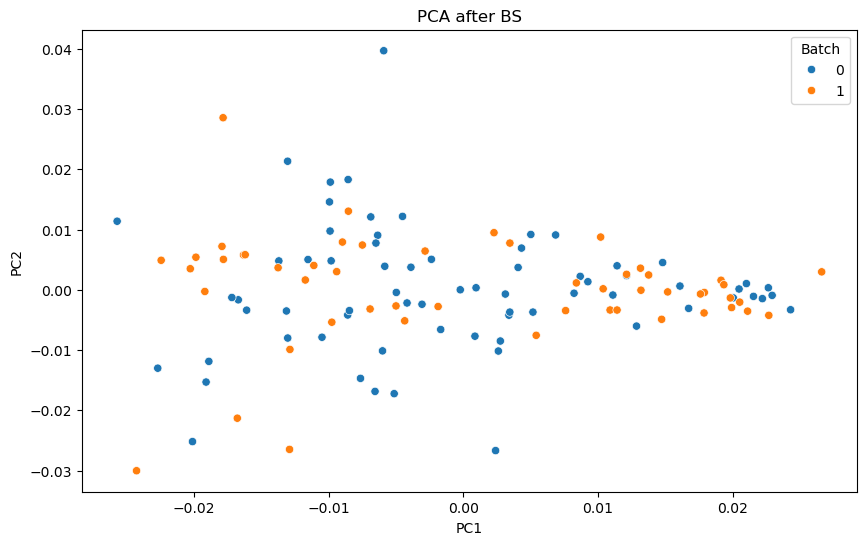

All zeros col num: 0
torch.Size([1, 56])
tensor(0.00090145, dtype=torch.float64) tensor(0.01151067, dtype=torch.float64) tensor(0.) tensor(1.)
torch.Size([121, 56]) torch.Size([121, 382]) torch.Size([121, 3])
(121, 4316)
(121, 3848)
(121, 3847)
low_abun ratio:  0.909537752934024
len dense 1197
tag2 (121, 1197)


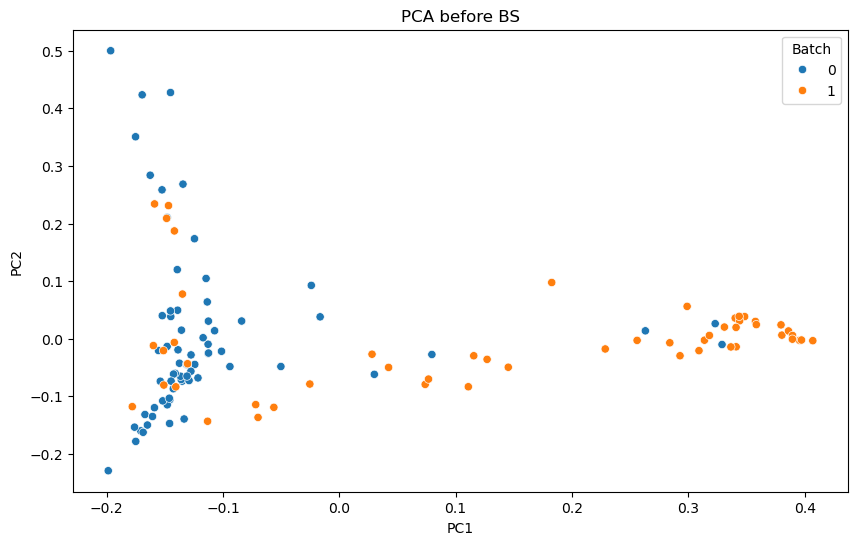

tag1 torch.Size([121, 1197])
tag1 torch.Size([121, 1197])


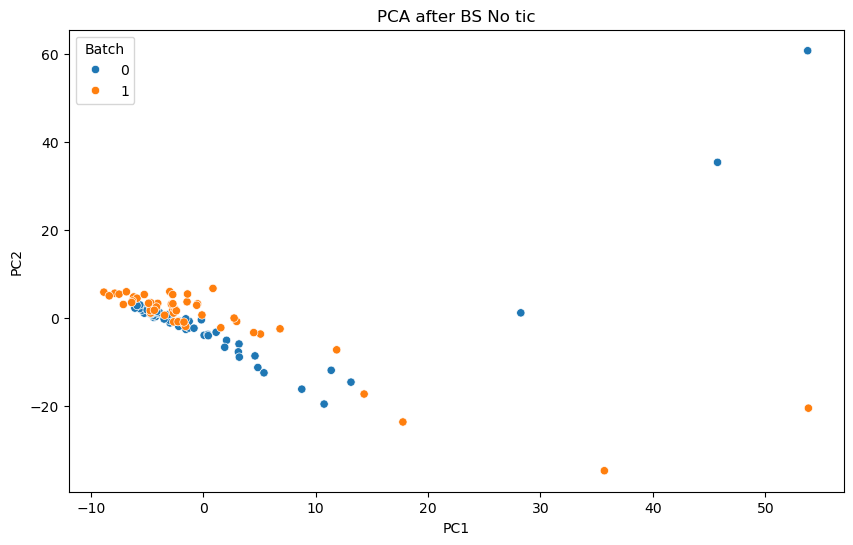

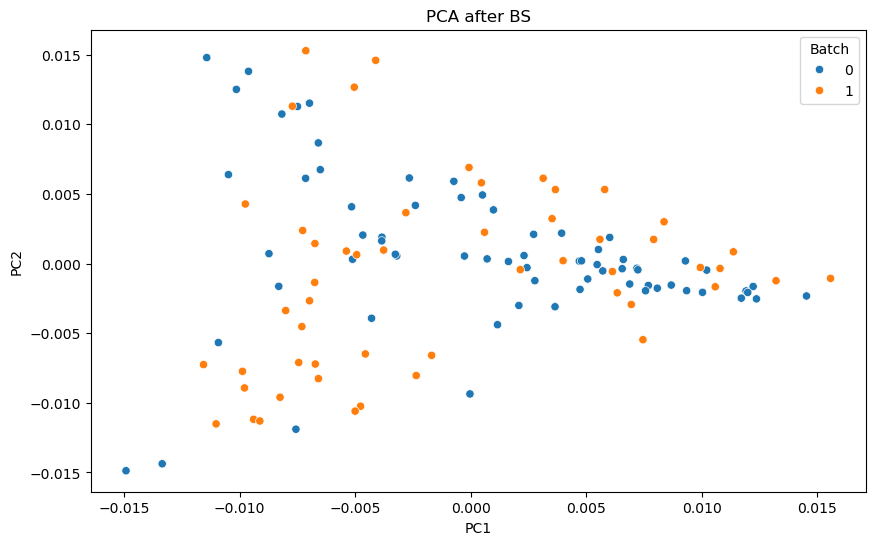

All zeros col num: 0
torch.Size([1, 56])
tensor(0.00032262, dtype=torch.float64) tensor(0.00855510, dtype=torch.float64) tensor(0.) tensor(1.)
torch.Size([121, 56]) torch.Size([121, 1197]) torch.Size([121, 3])
(121, 1028)
(121, 937)
(121, 936)
low_abun ratio:  0.8778872642509006
len dense 336
tag2 (121, 336)


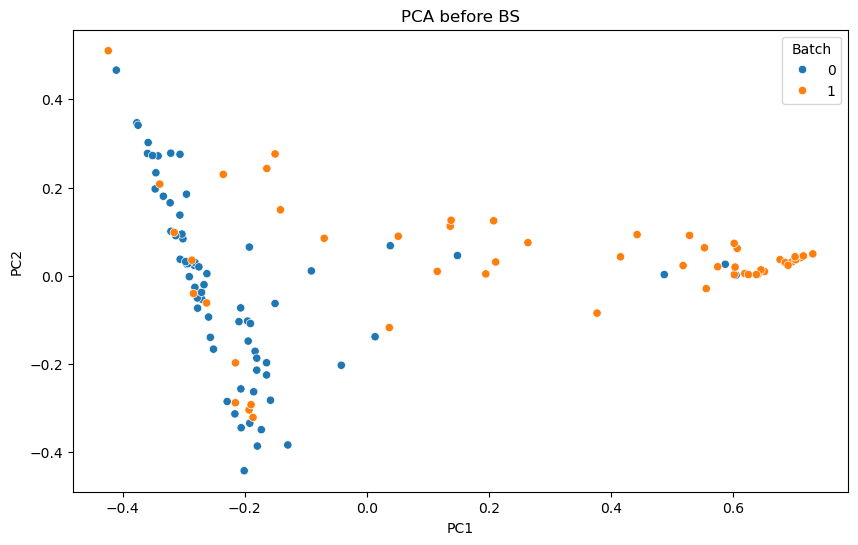

tag1 torch.Size([121, 336])
tag1 torch.Size([121, 336])


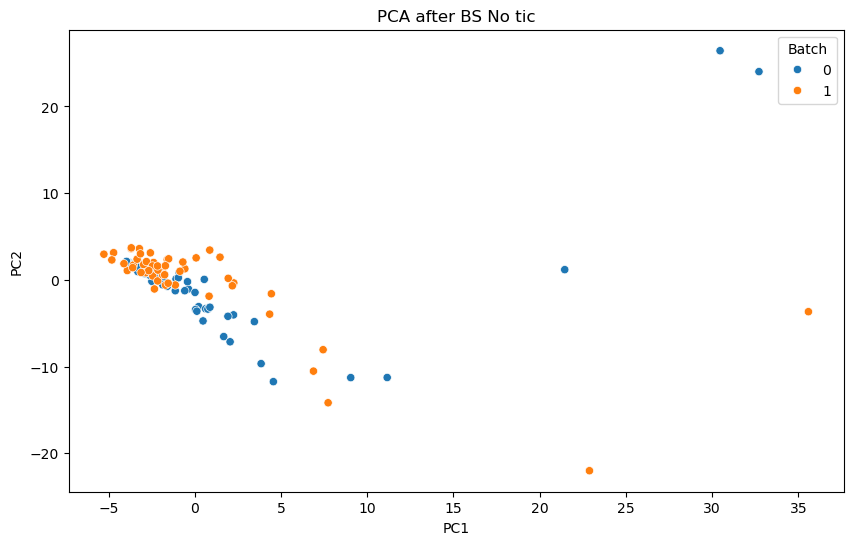

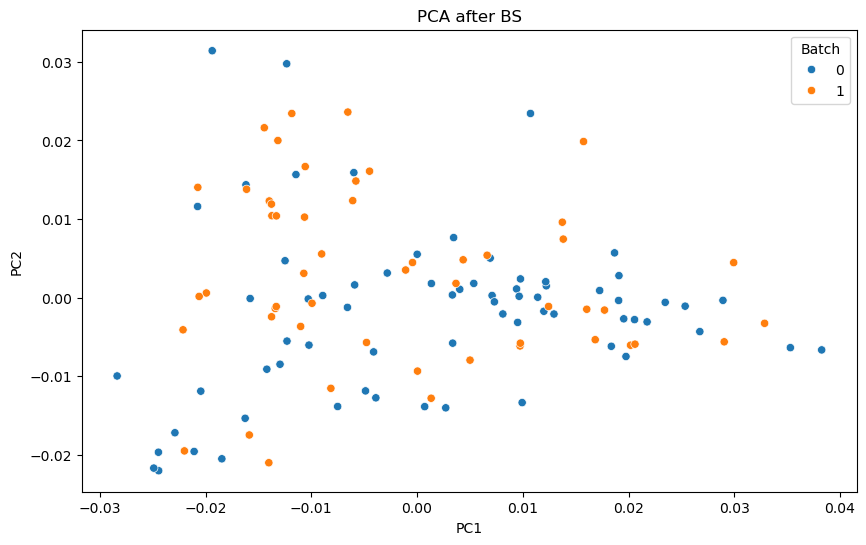

All zeros col num: 0
torch.Size([1, 56])
tensor(0.00068190, dtype=torch.float64) tensor(0.01823041, dtype=torch.float64) tensor(0.) tensor(1.)
torch.Size([121, 56]) torch.Size([121, 336]) torch.Size([121, 3])
(121, 330)
(121, 311)
(121, 310)
low_abun ratio:  0.7629432151426286
len dense 166
tag2 (121, 166)


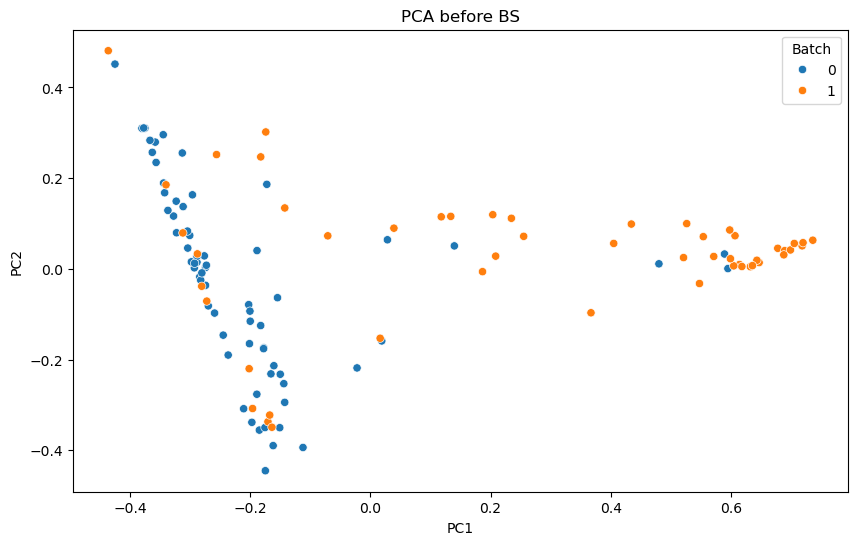

tag1 torch.Size([121, 166])
tag1 torch.Size([121, 166])


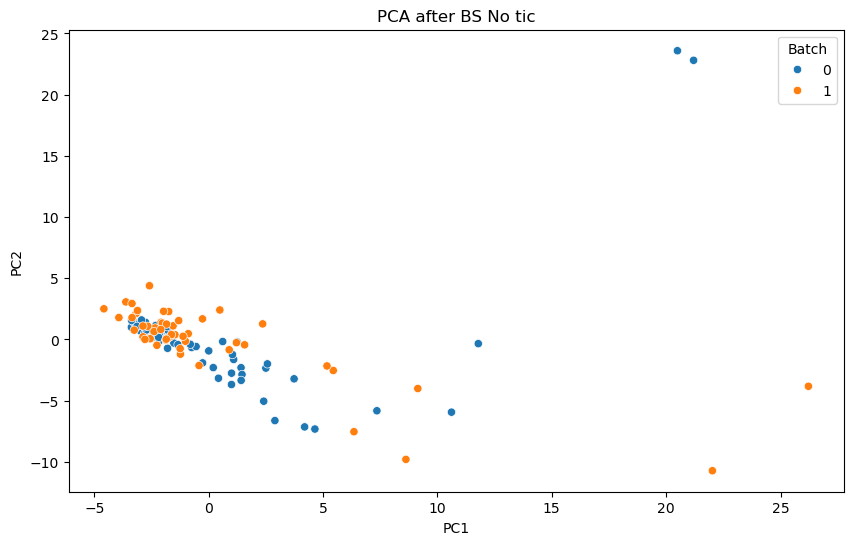

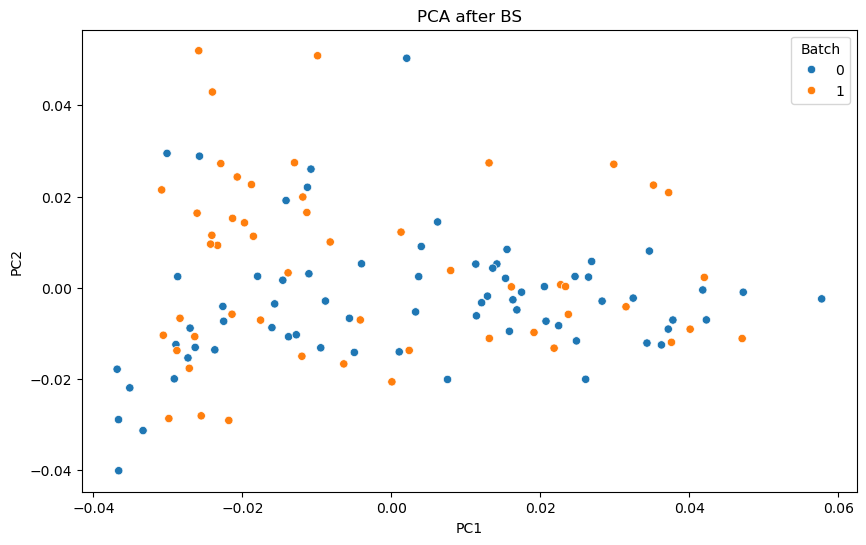

All zeros col num: 0
torch.Size([1, 56])
tensor(0.00098946, dtype=torch.float64) tensor(0.03232087, dtype=torch.float64) tensor(0.) tensor(1.)
torch.Size([121, 56]) torch.Size([121, 166]) torch.Size([121, 3])


In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from  utils import *
from pycombat import Combat
from sklearn.decomposition import PCA
torch.set_printoptions(precision=8)
pca = PCA(n_components=2)

levellist = ['T','S','G','F']
#levellist = ['T']# Strain,Species,Gene,Family
for level in levellist:
    data = open(
        f'../Data/cla_pickout_0606/mNGS.Microbe.{level}.uc.per', 'r').read()
    data_lines = data.split('\n')
    columns = data_lines[0].split()
    data_dict = [[] for col in columns]

    for line in data_lines:
        values = line.split()
        for col, val in enumerate(values):
            data_dict[col].append(val)

    mNGS_df = pd.DataFrame(data_dict, columns=data_dict[0])
    # df = df.transpose()
    # df.columns = df.iloc[0]

    mNGS_df = mNGS_df.drop(mNGS_df.index[0])
    mNGS_df = mNGS_df.rename(columns={mNGS_df.columns[0]: 'NGS_ID'})
    mNGS_df = mNGS_df[mNGS_df['NGS_ID'] != 'WBK230580'] #WBK230593 和 WBK230580  come form the same patient "P103"
    mNGS_df.iloc[:, 1:] = mNGS_df.iloc[:, 1:].astype('float32') #First column is mNGS_ID:str
    print(mNGS_df.shape)
    selected_df_onehot = selected_df_onehot[selected_df_onehot['NGS_ID'] != 'WBK230580']
    #WBK230593 and WBK230580  come form the same patient "P103"

    mNGS_df = mNGS_df.loc[:, ~(mNGS_df == 0).all(axis=0)] #drop 'ZERO COLUMN'
    print(mNGS_df.shape)
    
    ############# merging raw clinical data and raw mNGS data #############
    merged_df = pd.merge(selected_df_onehot, mNGS_df,
                        how='left', on='NGS_ID', validate='one_to_one')
    merged_df.to_excel(f'../Data/cli_mNGS.Microbe.{level}.xlsx', index=True)
    
    
    
    
    
    ############# Batch Standardize #############
    
    merged_df = pd.read_excel(f'../Data/cli_mNGS.Microbe.{level}.xlsx')
    features_df_mNGS = merged_df.iloc[:,
                                    merged_df.columns.get_loc('Responce2_SD')+1:]
    labels_df = merged_df.loc[:,'Responce2_CR-PR':'Responce2_SD']
    labels_arg = labels_df.values.argmax(axis=1)
    label_tag=["CR-PR",'PD','SD']
    
    label_str = np.array([label_tag[index] for index in labels_arg])
    
    batch_data = merged_df.loc[:, 'Batch']
    no_all_zero_col(features_df_mNGS)
    print(features_df_mNGS.shape)
    
    
    Prevalence_rate=0.1
    abun=1e-5
    Pre_single = 0.4
    dense_col =  dense_columns(features_df_mNGS,group_tag=labels_arg,\
                            Prevalence_rate=Prevalence_rate,threshold_low_abun=abun,\
                                    Pre_single=Pre_single)
    print('len dense',len(dense_col))
    features_df_mNGS = features_df_mNGS.iloc[:,dense_col]
    no_all_zero_col(features_df_mNGS)
    
    features_mNGS = torch.tensor(features_df_mNGS.values )
    print('tag2',features_df_mNGS.shape)
    
    plot_pca(features_mNGS,batch_data,'PCA before BS')
    print('tag1',features_mNGS.shape)
    
    features_mNGS = TIC_norm(features_mNGS)

    print('tag1',features_mNGS.shape)
    no_all_zero_col(features_mNGS)
    features_mNGS = batch_standardize(features_mNGS,batch_data)
    check_tensor(features_mNGS)
    
    features_mNGS_no_tic = features_mNGS.clone()
    plot_pca(features_mNGS,batch_data,'PCA after BS No tic')
    features_mNGS = TIC_norm(features_mNGS-features_mNGS.min(dim=1,keepdim=True)[0])
    plot_pca(features_mNGS,batch_data,'PCA after BS')
    mNGS_cols = features_df_mNGS.columns
    
    

    npvalue = features_df_mNGS.values.astype('float32')
    print("All zeros col num:", (npvalue.sum(axis=0) == 0).sum())


    ############# Normolization for clinical data #############
    features_df_cli = merged_df.loc[:, 'Gender':'TreatmentType_4']
    features_cli = torch.tensor(
        features_df_cli.values.astype('float32'))
    cli_cols = features_df_cli.columns
    
    features_cli = min_max_normalize(features_cli, dim=0).requires_grad_(False)
    print(features_mNGS[:, 0].min(), features_mNGS[:, 0].max(),
        features_cli[:, 0].min(), features_cli[:, 0].max())
    
    #######################labels##############################
    multi_labels = torch.tensor(labels_df.values.astype('float32'))

    print(features_cli.shape, features_mNGS.shape, multi_labels.shape)
    ###################### merging ############################
    df_cli = pd.DataFrame(features_cli,columns=cli_cols)
    df_mNGS = pd.DataFrame(features_mNGS,columns=mNGS_cols)
    #df_mNGS_no_tic = pd.DataFrame(features_mNGS_no_tic,columns=mNGS_cols)
    
    norm_merged_df = pd.concat([batch_data,df_cli,labels_df,df_mNGS],axis=1)
    norm_merged_df.to_excel(f'../Data/cli_mNGS.BS.{level}.xlsx')
    # norm_merged_df = pd.concat([batch_data,df_cli,labels_df,df_mNGS_no_tic],axis=1)
    # norm_merged_df.to_excel(f'../Data/cli_mNGS.BS_no_TIC.{level}.xlsx')
    

# Full Metabolism Processing Pipline (Co-name)

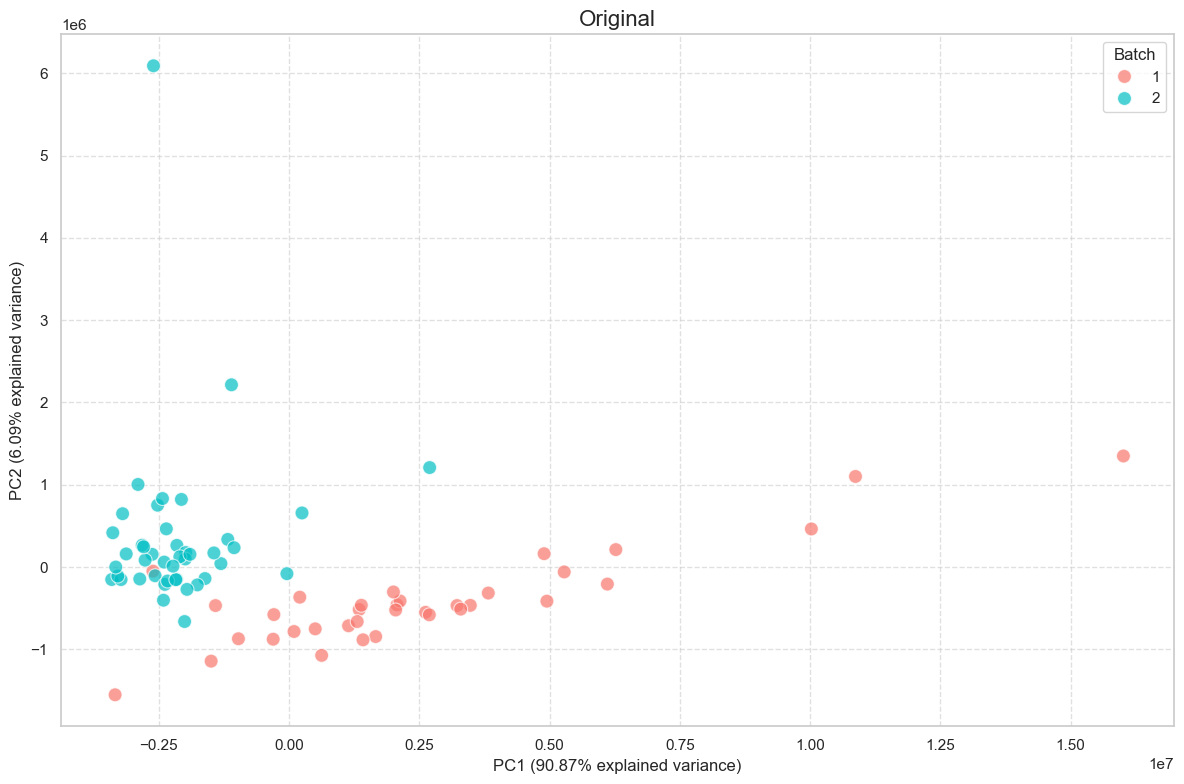

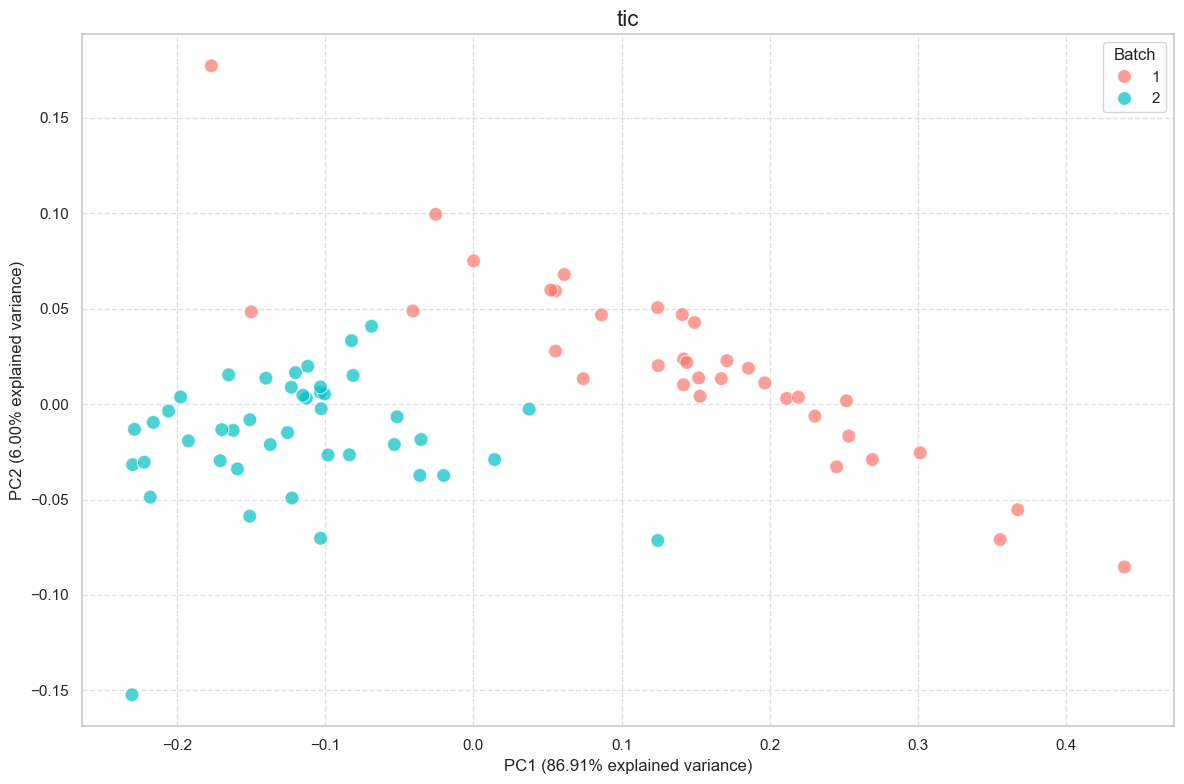

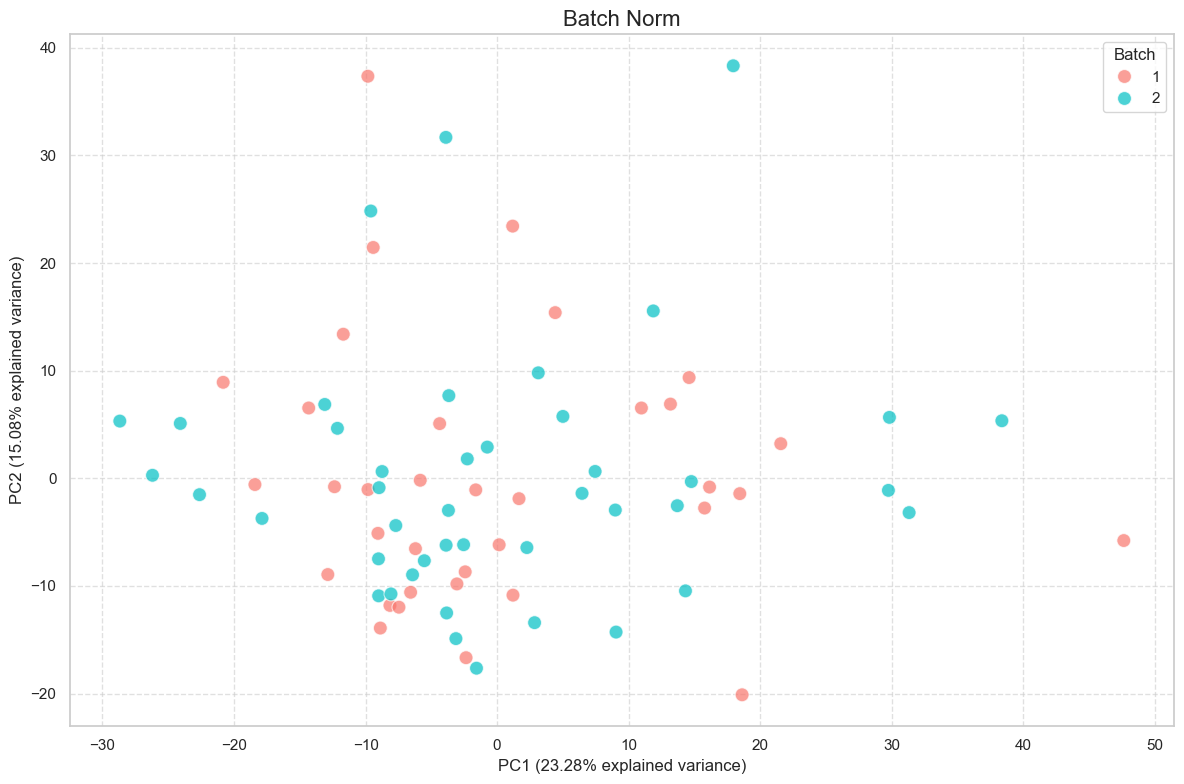

In [1]:
import pandas as pd
from utils import *
meta_df = pd.read_csv('../Data/metabolism/full/metabolites_full_table-all.csv',)
meta_df = meta_df.loc[:,'name':'C47'].T
meta_df.columns = meta_df.iloc[0]
meta_df = meta_df[1:].astype('float32')

meta_ID = meta_df.index
batch_str = meta_ID.str.startswith('A')
batch_data = np.zeros_like(batch_str,dtype=np.int8)
batch_data[batch_str==True]=1
batch_data[batch_str==False]=2

plot_pca(meta_df.values,batch_data,'Original',path = './Figure/meta_cor/')

tic_meta_df = TIC_norm(meta_df)
plot_pca(tic_meta_df.values,batch_data,'tic',path = './Figure/meta_cor/')

bs_tic_meta_df= batch_standardize(tic_meta_df,batch_data)
plot_pca(bs_tic_meta_df.values,batch_data,'Batch Norm',path = './Figure/meta_cor/')

levellist=['T','S','G','F']

#get column 'Metebolism_ID', as cli_ngs_df below did not contain it.
cli_ngs_df = pd.read_excel(f'../Data/cli_mNGS.Microbe.T.xlsx')
meta_ID = cli_ngs_df['Metebolism_ID']

for level in levellist:
    cli_ngs_df = pd.read_excel(f'../Data/cli_mNGS.BS.{level}.xlsx')
    cli_ngs_df.index = meta_ID.values

    merged_df = cli_ngs_df.join(bs_tic_meta_df, how='inner')
    merged_df.to_excel(f'../Data/cli_mNGS_meta_name.{level}.xlsx')


# Metabolism Processing Pipline (Co-name)


In [ ]:
import pandas as pd
from utils import *
def process_metabolism(data_batch):
    data_lines = data_batch.split('\n')
    columns = data_lines[0].split('\t')
    num_cols = len(columns)
    data_dict = [[] for col in columns]
    for index,line in enumerate(data_lines):
        values = line.split('\t')
        if values[0] == '':
            continue
        for col, val in enumerate(values):
            data_dict[col].append(val)
    assert len(set(data_dict[1])) == len(data_dict[1]) #Checking for Duplicate Values
    meta_df = pd.DataFrame(data_dict, columns=data_dict[1])#data_dict[1] -> col:name-non_target-LC_1
    
    # meta_df = meta_df.iloc[meta_df["Formula"]!='NA']
    # meta_df = meta_df.iloc[9:,:]
    meta_df = meta_df.rename(columns={meta_df.columns[0]: 'Metebolism_ID2'})
    #meta_df = meta_df.set_index('Metebolism_ID2')
    meta_df = meta_df.iloc[10:,:]
    
    drop_features = meta_df.columns[meta_df.columns.str.startswith('neg_') 
                                    | meta_df.columns.str.startswith('pos_')]
    meta_df = meta_df.drop(columns=drop_features)
    meta_df.iloc[:,1:] =  meta_df.iloc[:,1:].astype(float)
    return meta_df

source_data_batch1 = open(
    f'../Data/metabolism/batch1/output/BMK230309-BH533-ZX01-0101_all_cloud.txt', 'r').read()
source_data_batch2 = open(
    f'../Data/metabolism/batch2/output/BMK231030-BR510-ZX01-0101_all_cloud.txt', 'r').read()
meta1_df = process_metabolism(source_data_batch1)
meta2_df = process_metabolism(source_data_batch2)


intersection_cols = meta1_df.columns.intersection(meta2_df.columns)
meta1_df = meta1_df[intersection_cols]


meta2_df = meta2_df[intersection_cols]


meta_df = pd.concat([meta1_df,meta2_df],axis=0)

levellist = ['T','S','G','F']
df_not_QC = meta_df[~meta_df['Metebolism_ID2'].str.contains('QC')]
for level in levellist:
    cli_NGS_df = pd.read_excel(f'../Data/cli_mNGS.Microbe.{level}.xlsx') #CBT means Combat()
    print(cli_NGS_df.shape)
    cli_NGS_df = cli_NGS_df.loc[cli_NGS_df['Metebolism_ID2']!=-1]
    print(cli_NGS_df.shape)
    print(df_not_QC.shape)
    
    cli_NGS_meta_df = pd.merge(cli_NGS_df,df_not_QC,how='left', on='Metebolism_ID2', validate='one_to_one')
    print(cli_NGS_meta_df.shape)
    
    
    cli_NGS_meta_df.to_excel(f'../Data/cli_mNGS_meta_name.{level}.xlsx')
    print(f"Save Cli,mNGS,Meta Data in level {level}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pycombat import Combat
import numpy
from utils import CLR_normalize
# 合并两个批次数据
df_combined_with_index = pd.concat([meta1_df, meta2_df], axis=0)
df_index = df_combined_with_index['Metebolism_ID2']
df_col = df_combined_with_index.columns
df_combined = df_combined_with_index.iloc[:,1:].astype(float)
labels = np.array([0] * len(meta1_df) + [1] * len(meta2_df))


values_scaled = CLR_normalize(df_combined.values)

# PCA降维到2维
pca = PCA(n_components=2)
principal_components = pca.fit_transform(values_scaled)

# 将结果转换为DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Batch'] = labels

# 可视化
plt.figure(figsize=(10, 6))
colors = ['r', 'b']
for batch in [0, 1]:
    indices_to_keep = pca_df['Batch'] == batch
    plt.scatter(pca_df.loc[indices_to_keep, 'Principal Component 1'],
                pca_df.loc[indices_to_keep, 'Principal Component 2'],
                c=colors[batch],
                s=50,
                alpha=0.5,
                label=f'Batch {batch + 1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Two Batches')
plt.legend()
plt.show()


values_corrected = Combat().fit_transform(values_scaled, labels.astype('int'))
pca = PCA(n_components=2)
principal_components = pca.fit_transform(values_corrected)

# 将结果转换为DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Batch'] = labels

# 可视化
plt.figure(figsize=(10, 6))
colors = ['r', 'b']
for batch in [0, 1]:
    indices_to_keep = pca_df['Batch'] == batch
    plt.scatter(pca_df.loc[indices_to_keep, 'Principal Component 1'],
                pca_df.loc[indices_to_keep, 'Principal Component 2'],
                c=colors[batch],
                s=50,
                alpha=0.5,
                label=f'Batch {batch + 1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Two Batches')
plt.legend()
plt.show()


In [ ]:
df_corrected = pd.DataFrame(values_corrected,columns=df_col[1:])
df_corrected.insert(loc=0,column='Metebolism_ID2',value=df_index.values)
df_not_QC = df_corrected[~df_corrected['Metebolism_ID2'].str.contains('QC')]
df_batch1 = df_not_QC[df_not_QC['Metebolism_ID2'].str.contains('BMK230309')]
df_batch2 = df_not_QC[df_not_QC['Metebolism_ID2'].str.contains('BMK231030')]
df_batch1.sum()

In [ ]:
levellist = ['T','S','G','F']


for level in levellist:
    cli_NGS_df = pd.read_excel(f'../Data/cli_mNGS.CLR.CBT.{level}.xlsx') #CBT means Combat()
    print(cli_NGS_df.shape)
    cli_NGS_df = cli_NGS_df.loc[cli_NGS_df['Metebolism_ID2']!=-1]
    print(cli_NGS_df.shape)
    print(df_not_QC.shape)
    
    cli_NGS_meta_df = pd.merge(cli_NGS_df,df_not_QC,how='left', on='Metebolism_ID2', validate='one_to_one')
    print(cli_NGS_meta_df.shape)
    
    
    cli_NGS_meta_df.to_excel(f'../Data/cli_mNGS_meta_name.CLR.CBT.{level}.xlsx')
    print(f"Save Cli,mNGS,Meta Data in level {level}")

# Metabolism Processing Pipline (Co-mz)

In [2]:
import pandas as pd
from utils import *
def process_metabolism(data_batch):
    data_lines = data_batch.split('\n')
    columns = data_lines[0].split('\t')
    data_dict = [[] for col in columns]
    #read data_batch into dict
    for index,line in enumerate(data_lines):
        values = line.split('\t')
        if values[0] == '':
            continue
        for col, val in enumerate(values):
            data_dict[col].append(val)
    assert len(set(data_dict[1])) == len(data_dict[1]) #Checking for Duplicate Values
    
    # process data_dict[8] (m/z values)
    for index,str_value in enumerate(data_dict[8]): #data_dict[8] -> col:m/z
        if index==0: # data_dict[8][0] is 'm/z', which can not be converted to float
            continue
        else: 
            if data_dict[0][index].startswith('neg_'):
                data_dict[8][index] = str(-round(float(str_value), 3))
            elif data_dict[0][index].startswith('pos_'):
                data_dict[8][index] = str(round(float(str_value), 3))
            else:
                raise TypeError
    temp_columns = [f'{col}_{i}' for i, col in enumerate(data_dict[8])]
    
    #assert len(set(data_dict[8])) == len(data_dict[8]),[len(set(data_dict[8])),len(data_dict[8])] #Checking for Duplicate Values     
    meta_df = pd.DataFrame(data_dict, columns=temp_columns)
    
    # meta_df = meta_df.iloc[meta_df["Formula"]!='NA']
    # meta_df = meta_df.iloc[9:,:]
    
    #meta_df = meta_df.set_index('Metebolism_ID2')
    meta_df = meta_df.iloc[10:,:]
    meta_df.iloc[:,1:] =  meta_df.iloc[:,1:].astype(float)
    print(data_dict[8][1:])
   
    meta_df = meta_df.groupby(data_dict[8],axis=1).sum()
    # move 'm/z' to the first column
    cols = meta_df.columns.tolist()
    cols.insert(0, cols.pop(cols.index('m/z')))
    meta_df = meta_df[cols]
    meta_df = meta_df.rename(columns={meta_df.columns[0]: 'Metebolism_ID2'})
    return meta_df

source_data_batch1 = open(
    f'../Data/metabolism/batch1/output/BMK230309-BH533-ZX01-0101_all_cloud.txt', 'r').read()
source_data_batch2 = open(
    f'../Data/metabolism/batch2/output/BMK231030-BR510-ZX01-0101_all_cloud.txt', 'r').read()
meta1_df = process_metabolism(source_data_batch1)
meta2_df = process_metabolism(source_data_batch2)


intersection_cols = meta1_df.columns.intersection(meta2_df.columns)
print('Co intersetion num:',intersection_cols.shape)
meta1_df = meta1_df[intersection_cols]


meta2_df = meta2_df[intersection_cols]
meta_df = pd.concat([meta1_df,meta2_df],axis=0)
meta_df.to_excel('../Data/Meta_mz.xlsx',index=False)
print('2',meta_df.shape)
levellist = ['T','S','G','F']
df_not_QC = meta_df.loc[~meta_df['Metebolism_ID2'].str.contains('QC')]
for level in levellist:
    cli_NGS_df = pd.read_excel(f'../Data/cli_mNGS.Microbe.{level}.xlsx')
    print(cli_NGS_df.shape)
    cli_NGS_df = cli_NGS_df.loc[cli_NGS_df['Metebolism_ID2']!=-1]
    print(cli_NGS_df.shape)
    print(df_not_QC.shape)
    
    cli_NGS_meta_df = pd.merge(cli_NGS_df,df_not_QC,how='left', on='Metebolism_ID2', validate='one_to_one')
    print(cli_NGS_meta_df.shape)
    
    
    cli_NGS_meta_df.to_excel(f'../Data/cli_mNGS_meta_mz.{level}.xlsx')
    print(f"Save Cli,mNGS,Meta Data in level {level}")

['-145.931', '-418.894', '-812.849', '-652.718', '-655.693', '-665.704', '-703.683', '-672.699', '-685.698', '-692.22', '-697.225', '-742.666', '-838.848', '-699.226', '-723.67', '-733.673', '-737.672', '-780.64', '-749.666', '-770.648', '-753.666', '-786.633', '-829.588', '-818.625', '-801.617', '-803.603', '-827.612', '-833.523', '-861.551', '-850.608', '-859.541', '-854.826', '-867.595', '-871.59', '-875.602', '-89.927', '-899.589', '-932.57', '-925.571', '-940.575', '-989.546', '-1024.536', '-330.83', '-328.832', '-332.827', '-524.299', '-172.868', '-136.863', '-136.984', '-233.002', '-891.833', '-239.904', '-125.873', '-126.882', '-162.839', '-127.871', '-138.907', '-141.868', '-189.86', '-159.86', '-160.842', '-906.835', '-170.872', '-177.913', '-195.811', '-197.808', '-199.805', '-201.802', '-207.837', '-157.863', '-205.841', '-206.827', '-114.933', '-116.928', '-134.894', '-144.925', '-199.851', '-155.866', '-173.871', '-184.865', '-203.845', '-915.831', '-213.868', '-216.854',

/tmp/ipykernel_5399/2366611669.py:40: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  meta_df = meta_df.groupby(data_dict[8],axis=1).sum()


['-181.071', '-229.878', '-362.941', '-153.869', '-155.866', '-362.05', '-633.124', '-677.089', '-714.554', '-190.928', '-852.961', '-133.014', '-167.021', '-226.977', '-224.98', '-270.915', '-242.944', '-304.921', '-306.918', '-340.893', '-323.028', '-357.031', '-342.894', '-362.878', '-735.046', '-446.905', '-398.855', '-400.851', '-402.849', '-850.964', '-456.814', '-458.81', '-460.807', '-514.773', '-516.769', '-294.954', '-518.766', '-572.73', '-574.727', '-576.725', '-578.718', '-611.143', '-632.684', '-636.678', '-737.045', '-750.598', '-310.931', '-787.467', '-793.005', '-468.695', '-172.843', '-160.842', '-162.839', '-197.808', '-177.845', '-193.816', '-199.805', '-706.821', '-201.802', '-205.84', '-408.742', '-410.738', '-528.65', '-584.607', '-195.811', '-179.843', '-203.8', '-378.918', '-328.058', '-386.017', '-354.777', '-388.014', '-443.976', '-445.973', '-501.933', '-503.93', '-340.945', '-559.892', '-561.889', '-621.845', '-294.82', '-350.782', '-352.779', '-412.736', '

/tmp/ipykernel_5399/2366611669.py:40: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  meta_df = meta_df.groupby(data_dict[8],axis=1).sum()


Co intersetion num: (745,)
2 (98, 745)
(121, 1056)
(78, 1056)
(88, 745)
(78, 1800)
Save Cli,mNGS,Meta Data in level T
(121, 3917)
(78, 3917)
(88, 745)
(78, 4661)
Save Cli,mNGS,Meta Data in level S
(121, 1006)
(78, 1006)
(88, 745)
(78, 1750)
Save Cli,mNGS,Meta Data in level G
(121, 380)
(78, 380)
(88, 745)
(78, 1124)
Save Cli,mNGS,Meta Data in level F


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from pycombat import Combat
# import numpy
# from utils import CLR_normalize
# from sklearn.linear_model import LinearRegression
# # 合并两个批次数据
# df_combined = pd.concat([meta1_df, meta2_df], axis=0)
# df_index = df_combined['Metebolism_ID2']
# df_combined['QC']=df_index.str.contains('QC')
# labels = np.array([0] * len(meta1_df) + [1] * len(meta2_df))
# df_combined['Batch'] = labels

# cols_to_transform = df_combined.columns.difference(['Metebolism_ID2','QC','Batch'])
# df_combined[cols_to_transform] = TIC_norm(df_combined[cols_to_transform])


# qc_samples = df_combined[df_combined['QC']==True]
# non_qc_samples = df_combined[df_combined['QC']==False]

# qc_samples_mean = qc_samples.drop(columns=['Metebolism_ID2','QC','Batch']).mean(axis=0)
# qc_samples_std = qc_samples.drop(columns=['Metebolism_ID2','QC','Batch']).std(axis=0)

# data_normalized = df_combined.copy()
# data_normalized[cols_to_transform] = (df_combined[cols_to_transform] - qc_samples_mean) / qc_samples_std

# def correct_batch_effect(data, qc_samples):
#     corrected_data = data.copy()
#     for column in data.columns:
#         if column not in ['Metebolism_ID2','QC','Batch']:
#             # 线性回归矫正
#             X = qc_samples[['Batch']].values
#             y = qc_samples[column].values
#             model = LinearRegression().fit(X, y)
#             corrected_data[column] = data[column] - model.predict(data[['Batch']].values)
#     return corrected_data


# data_corrected = correct_batch_effect(data_normalized, qc_samples)


# # 可视化批次效应矫正前后的数据
# pca = PCA(n_components=2)
# data_pca_before = pca.fit_transform(data_normalized.drop(columns=['Metebolism_ID2','QC','Batch']))
# data_pca_after = pca.fit_transform(data_corrected.drop(columns=['Metebolism_ID2','QC','Batch']))







# plt.figure(figsize=(14, 7))
# # 矫正前
# QC_ = df_combined['QC'].values
# plt.subplot(1, 2, 1)
# scatter = plt.scatter(data_pca_before[:, 0], data_pca_before[:, 1], 
#                       c=df_combined['Batch'].values, 
#                       marker='o', 
#                       cmap='coolwarm', 
#                       alpha=0.7,)
# plt.scatter(data_pca_before[QC_, 0], data_pca_before[QC_, 1], 
#                       c='#BEB8DC')

# plt.title('Before Batch Effect Correction')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=['Batch 0', 'Batch 1'], 
#            title="Batch")
# plt.grid(True)

# # 矫正后
# plt.subplot(1, 2, 2)

# scatter = plt.scatter(data_pca_after[:, 0], data_pca_after[:, 1], 
#                       c=df_combined['Batch'].values, 
#                       marker='o', 
#                       cmap='coolwarm', 
#                       alpha=0.7)
# plt.scatter(data_pca_after[QC_, 0], data_pca_after[QC_, 1], 
#                       c='#8ECFC9')
# plt.title('After Batch Effect Correction')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=['Batch 0', 'Batch 1'], 
#            title="Batch")
# plt.grid(True)

# plt.tight_layout()
# plt.show()

QC col num 13
QC col num 120
df_combined col num 747
data_corrected col num 614
(121, 1056)
(78, 1056)
(88, 612)
(78, 1667)
Save Cli,mNGS,Meta Data in level T
(121, 3917)
(78, 3917)
(88, 612)
(78, 4528)
Save Cli,mNGS,Meta Data in level S
(121, 1006)
(78, 1006)
(88, 612)
(78, 1617)
Save Cli,mNGS,Meta Data in level G
(121, 380)
(78, 380)
(88, 612)
(78, 991)
Save Cli,mNGS,Meta Data in level F


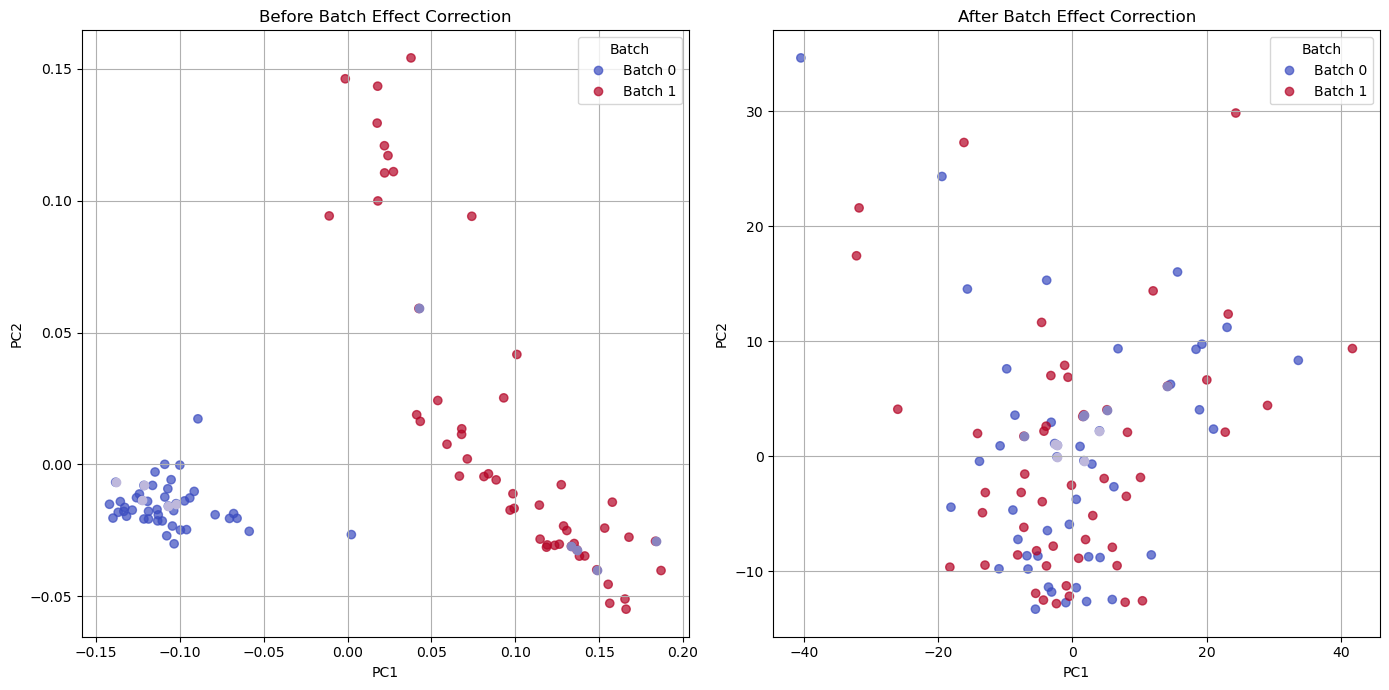

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pycombat import Combat
import numpy
from utils import CLR_normalize
from sklearn.linear_model import LinearRegression
# 合并两个批次数据
df_combined = pd.concat([meta1_df, meta2_df], axis=0)
df_index = df_combined['Metebolism_ID2']
df_combined['QC']=df_index.str.contains('QC')
labels = np.array([0] * len(meta1_df) + [1] * len(meta2_df))
df_combined['Batch'] = labels

cols_to_transform = df_combined.columns.difference(['Metebolism_ID2','QC','Batch'])
df_combined[cols_to_transform] = TIC_norm(df_combined[cols_to_transform])



df_batch1 = df_combined[df_combined['Batch']==0.]
df_batch2 = df_combined[df_combined['Batch']==1.]
##############################################################
QC_filted=[]
for df_batch in [df_batch1,df_batch2]:
    diff = (df_batch.loc[df_batch['QC'] == False].drop(columns=['Metebolism_ID2', 'QC', 'Batch']).mean(axis=0) - 
        df_batch.loc[df_batch['QC'] == True].drop(columns=['Metebolism_ID2', 'QC', 'Batch']).mean(axis=0))

    # 计算绝对差值并获取布尔索引
    mask = (diff.abs() > 0.003)
    QC_filted+= diff.index[diff.abs() > 0.003].tolist()
QC_filted = list(set(QC_filted)) #Remove duplicate values
df_batch1 = df_batch1.drop(columns=QC_filted)
df_batch2 = df_batch2.drop(columns=QC_filted)
print("QC col num",len(QC_filted))
################################################################
QC_filted=[]
for batched_data in [df_batch1,df_batch2]:
        QC_df = batched_data.loc[batched_data['QC'] == True].drop(columns=['Metebolism_ID2', 'QC', 'Batch'])
        
        
        std_devs = QC_df.std()
        means = QC_df.mean()
        rsds = std_devs/means
        QC_filted += (QC_df.loc[:,rsds >= 0.3]).columns.tolist()
QC_filted = list(set(QC_filted))#Remove duplicate values
df_batch1 = df_batch1.drop(columns=QC_filted)
df_batch2 = df_batch2.drop(columns=QC_filted)
print("QC col num",len(QC_filted))

#################################################################
cols_to_transform = df_batch1.columns.difference(['Metebolism_ID2','QC','Batch'])

samples_mean = df_batch1.drop(columns=['Metebolism_ID2','QC','Batch']).mean(axis=0)
samples_std = df_batch1.drop(columns=['Metebolism_ID2','QC','Batch']).std(axis=0)
normed_df_batch1 = df_batch1.copy()
normed_df_batch1[cols_to_transform] = (normed_df_batch1[cols_to_transform]-samples_mean) / samples_std


samples_mean = df_batch2.drop(columns=['Metebolism_ID2','QC','Batch']).mean(axis=0)
samples_std = df_batch2.drop(columns=['Metebolism_ID2','QC','Batch']).std(axis=0)
normed_df_batch2 = df_batch2.copy()
normed_df_batch2[cols_to_transform] = (normed_df_batch2[cols_to_transform]-samples_mean) / samples_std
data_corrected = pd.concat([normed_df_batch1,normed_df_batch2],axis=0)






# 可视化批次效应矫正前后的数据
pca = PCA(n_components=2)
data_pca_before = pca.fit_transform(df_combined.drop(columns=['Metebolism_ID2','QC','Batch']))
data_pca_after = pca.fit_transform(data_corrected.drop(columns=['Metebolism_ID2','QC','Batch']))
print("df_combined col num",df_combined.shape[-1])
print("data_corrected col num",data_corrected.shape[-1])

df_not_QC = data_corrected.drop(columns=['QC','Batch']).loc[~data_corrected['Metebolism_ID2'].str.contains('QC')]
for level in levellist:
    cli_NGS_df = pd.read_excel(f'../Data/cli_mNGS.Microbe.{level}.xlsx')
    print(cli_NGS_df.shape)
    cli_NGS_df = cli_NGS_df.loc[cli_NGS_df['Metebolism_ID2']!=-1]
    print(cli_NGS_df.shape)
    print(df_not_QC.shape)
    
    cli_NGS_meta_df = pd.merge(cli_NGS_df,df_not_QC,how='left', on='Metebolism_ID2', validate='one_to_one')
    print(cli_NGS_meta_df.shape)
    
    
    cli_NGS_meta_df.to_excel(f'../Data/cli_mNGS_meta_mz_QC_std.{level}.xlsx')
    print(f"Save Cli,mNGS,Meta Data in level {level}")






plt.figure(figsize=(14, 7))
# 矫正前
QC_1 = (df_combined['QC'].values==1.) & (df_combined['Batch'].values==0.)
QC_2 = (df_combined['QC'].values==1.) & (df_combined['Batch'].values==1.)

plt.subplot(1, 2, 1)
scatter = plt.scatter(data_pca_before[:, 0], data_pca_before[:, 1], 
                      c=df_combined['Batch'].values, 
                      marker='o', 
                      cmap='coolwarm', 
                      alpha=0.7,)
plt.scatter(data_pca_before[QC_1, 0], data_pca_before[QC_1, 1], 
                      c='#BEB8DC')
plt.scatter(data_pca_before[QC_2, 0], data_pca_before[QC_2, 1], 
                      c='#8983BF')

plt.title('Before Batch Effect Correction')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=['Batch 0', 'Batch 1'], 
           title="Batch")
plt.grid(True)

# 矫正后
plt.subplot(1, 2, 2)

scatter = plt.scatter(data_pca_after[:, 0], data_pca_after[:, 1], 
                      c=df_combined['Batch'].values, 
                      marker='o', 
                      cmap='coolwarm', 
                      alpha=0.7)
plt.scatter(data_pca_after[QC_1, 0], data_pca_after[QC_1, 1], 
                      c='#BEB8DC')
plt.scatter(data_pca_after[QC_2, 0], data_pca_after[QC_2, 1], 
                      c='#8983BF')
plt.title('After Batch Effect Correction')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=['Batch 0', 'Batch 1'], 
           title="Batch")
plt.grid(True)

plt.tight_layout()
plt.show()

In [96]:
(((df_batch1.loc[df_batch1['QC']==False].drop(columns=['Metebolism_ID2','QC','Batch']).mean(axis=0)-df_batch1.loc[df_batch1['QC']==True].drop(columns=['Metebolism_ID2','QC','Batch']).mean(axis=0))).abs()>0.003).sum()


7

In [95]:
(((df_batch2.loc[df_batch2['QC']==False].drop(columns=['Metebolism_ID2','QC','Batch']).mean(axis=0)-df_batch2.loc[df_batch2['QC']==True].drop(columns=['Metebolism_ID2','QC','Batch']).mean(axis=0))).abs()>0.003).sum()


8

(-0.004, 0.004)

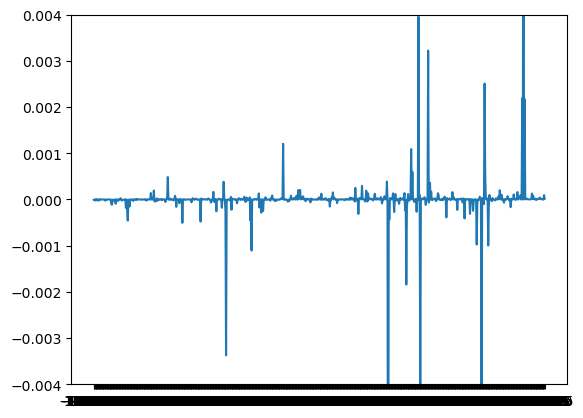

In [94]:
diff = (df_batch1.loc[df_batch1['QC'] == False].drop(columns=['Metebolism_ID2', 'QC', 'Batch']).mean(axis=0) - 
        df_batch1.loc[df_batch1['QC'] == True].drop(columns=['Metebolism_ID2', 'QC', 'Batch']).mean(axis=0))

# 绘制图形
plt.plot(diff)
plt.ylim(-0.004, 0.004)